In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('AAPL2.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-04-20,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.713509,93278400
2017-04-21,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.673267,69283600
2017-04-24,2017-04-24,35.875000,35.987499,35.794998,35.910000,33.997524,68537200
2017-04-25,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.208172,75486000
2017-04-26,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.006992,80164800
...,...,...,...,...,...,...,...
2017-08-17,2017-08-17,40.130001,40.177502,39.459999,39.465000,37.664749,111762400
2017-08-18,2017-08-18,39.465000,39.875000,39.180000,39.375000,37.578854,109712400
2017-08-21,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.509666,105474000


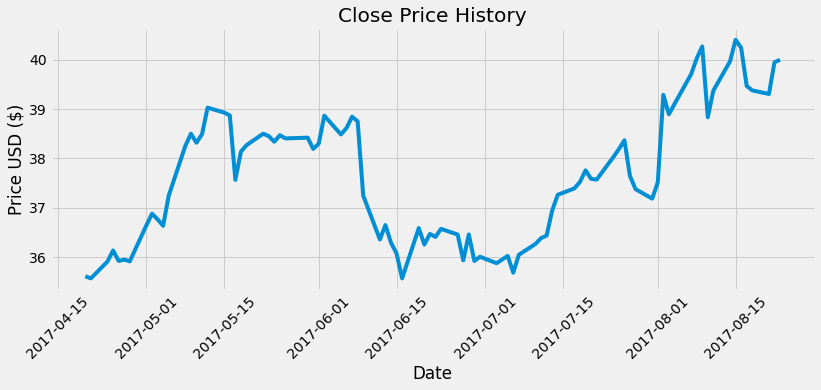

In [10]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [13]:
#calculate MACF and signal line indicators
#calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#calculate the long term exponential moving average(EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#calculate the MACD line
MACD = ShortEMA - LongEMA
#calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

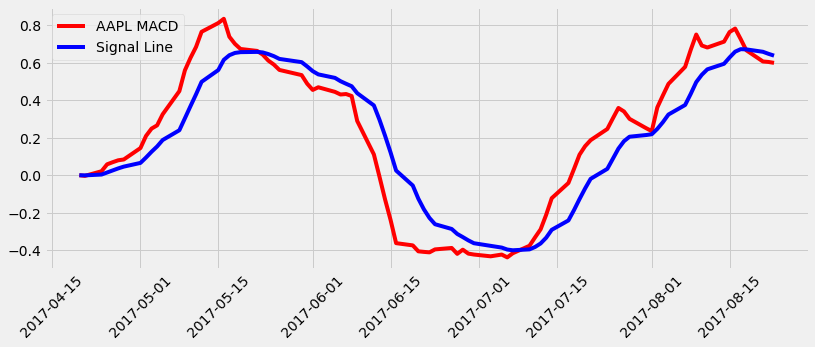

In [16]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color='Red')
plt.plot(df.index, signal, label='Signal Line', color= 'blue')
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.show()

In [17]:
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,,
2017-04-20,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.713509,93278400,0.000000,0.000000
2017-04-21,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.673267,69283600,-0.003390,-0.000678
2017-04-24,2017-04-24,35.875000,35.987499,35.794998,35.910000,33.997524,68537200,0.021314,0.003720
2017-04-25,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.208172,75486000,0.058176,0.014611
2017-04-26,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.006992,80164800,0.069441,0.025577
...,...,...,...,...,...,...,...,...,...
2017-08-17,2017-08-17,40.130001,40.177502,39.459999,39.465000,37.664749,111762400,0.725700,0.672078
2017-08-18,2017-08-18,39.465000,39.875000,39.180000,39.375000,37.578854,109712400,0.666326,0.670928
2017-08-21,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.509666,105474000,0.606431,0.658028


In [18]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)

In [19]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2017-04-20,2017-04-20,35.305000,35.730000,35.290001,35.610001,33.713509,93278400,0.000000,0.000000,NaN,NaN
2017-04-21,2017-04-21,35.610001,35.669998,35.462502,35.567501,33.673267,69283600,-0.003390,-0.000678,NaN,35.567501
2017-04-24,2017-04-24,35.875000,35.987499,35.794998,35.910000,33.997524,68537200,0.021314,0.003720,35.91,NaN
2017-04-25,2017-04-25,35.977501,36.224998,35.967499,36.132500,34.208172,75486000,0.058176,0.014611,NaN,NaN
2017-04-26,2017-04-26,36.117500,36.150002,35.845001,35.919998,34.006992,80164800,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-17,2017-08-17,40.130001,40.177502,39.459999,39.465000,37.664749,111762400,0.725700,0.672078,NaN,NaN
2017-08-18,2017-08-18,39.465000,39.875000,39.180000,39.375000,37.578854,109712400,0.666326,0.670928,NaN,39.375000
2017-08-21,2017-08-21,39.375000,39.472500,38.777500,39.302502,37.509666,105474000,0.606431,0.658028,NaN,NaN


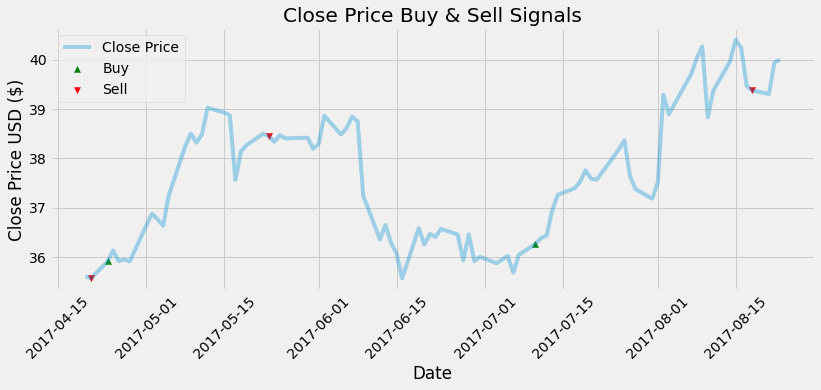

In [23]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()